## TensorFlow Model

In this project, we will use TensorFlow to predict the value of NBA players, based on different features. 

In [3]:
## first the general imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## the training and test data related packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

## math related packages
from tensorflow import math

from tensorflow.keras.utils import plot_model

## testing to see if using TensorFlow GPU
if (tf.config.list_physical_devices('GPU')):
    print('Yes')

In [23]:
## first loading the data
nba_data = pd.read_csv('C://Users//12145//Documents//GitHub//Python//data//nba_salary_stats.csv')
## checking the types and see if we have any null values
nba_data.info()
## other way could be to 
## nba_data.isna().sum()
## and we had nan 
## nba_data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  289 non-null    object 
 1   last_name   289 non-null    object 
 2   team        289 non-null    object 
 3   salary      289 non-null    float64
 4   pos         289 non-null    object 
 5   age         289 non-null    int64  
 6   g           289 non-null    int64  
 7   gs          289 non-null    int64  
 8   mp          289 non-null    int64  
 9   fg          289 non-null    int64  
 10  fga         289 non-null    int64  
 11  fg%         289 non-null    float64
 12  3p          289 non-null    int64  
 13  3pa         289 non-null    int64  
 14  3p%         289 non-null    float64
 15  2p          289 non-null    int64  
 16  2pa         289 non-null    int64  
 17  2p%         289 non-null    float64
 18  efg%        289 non-null    float64
 19  ft          289 non-null    i

In [64]:
## the next step is to remove any useless features
## and cleaning the data and reducing the memory usage
def data_cleaning(df, drop_cols = []):
    type_change_dict = {}
    if drop_cols:
        df = df.drop(drop_cols, axis=1)
    for col in df.columns:
        ## replacing all the non-alphabetic characters
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(r'\W', '', regex=True)
        ## changing the type when possible
        elif df[col].dtype == 'float64' and df[col].min() == df.astype({col:'float16'})[col].min():
            type_change_dict[col] = 'float16'
        elif df[col].dtype == 'float64' and df[col].min() == df.astype({col:'float32'})[col].min():
            type_change_dict[col] = 'float32'
        elif df[col].dtype == 'int64' and df[col].min() == df.astype({col:'int8'})[col].min():
            type_change_dict[col] = 'int8'
        elif df[col].dtype == 'int64' and df[col].min() == df.astype({col:'int16'})[col].min():
            type_change_dict[col] = 'int16'
    ## returning the new df with changed types
    return df.astype(type_change_dict)
    
cleaned_data = data_cleaning(nba_data, drop_cols=['first_name', 'last_name'])
## this simple function, cut the memory usage to less than half
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   team    289 non-null    object 
 1   salary  289 non-null    float32
 2   pos     289 non-null    object 
 3   age     289 non-null    int8   
 4   g       289 non-null    int8   
 5   gs      289 non-null    int8   
 6   mp      289 non-null    int16  
 7   fg      289 non-null    int16  
 8   fga     289 non-null    int16  
 9   fg%     289 non-null    float64
 10  3p      289 non-null    int16  
 11  3pa     289 non-null    int16  
 12  3p%     289 non-null    float16
 13  2p      289 non-null    int16  
 14  2pa     289 non-null    int16  
 15  2p%     289 non-null    float64
 16  efg%    289 non-null    float64
 17  ft      289 non-null    int16  
 18  fta     289 non-null    int16  
 19  ft%     289 non-null    float64
 20  orb     289 non-null    int16  
 21  drb     289 non-null    int16  
 22  tr

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1181: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


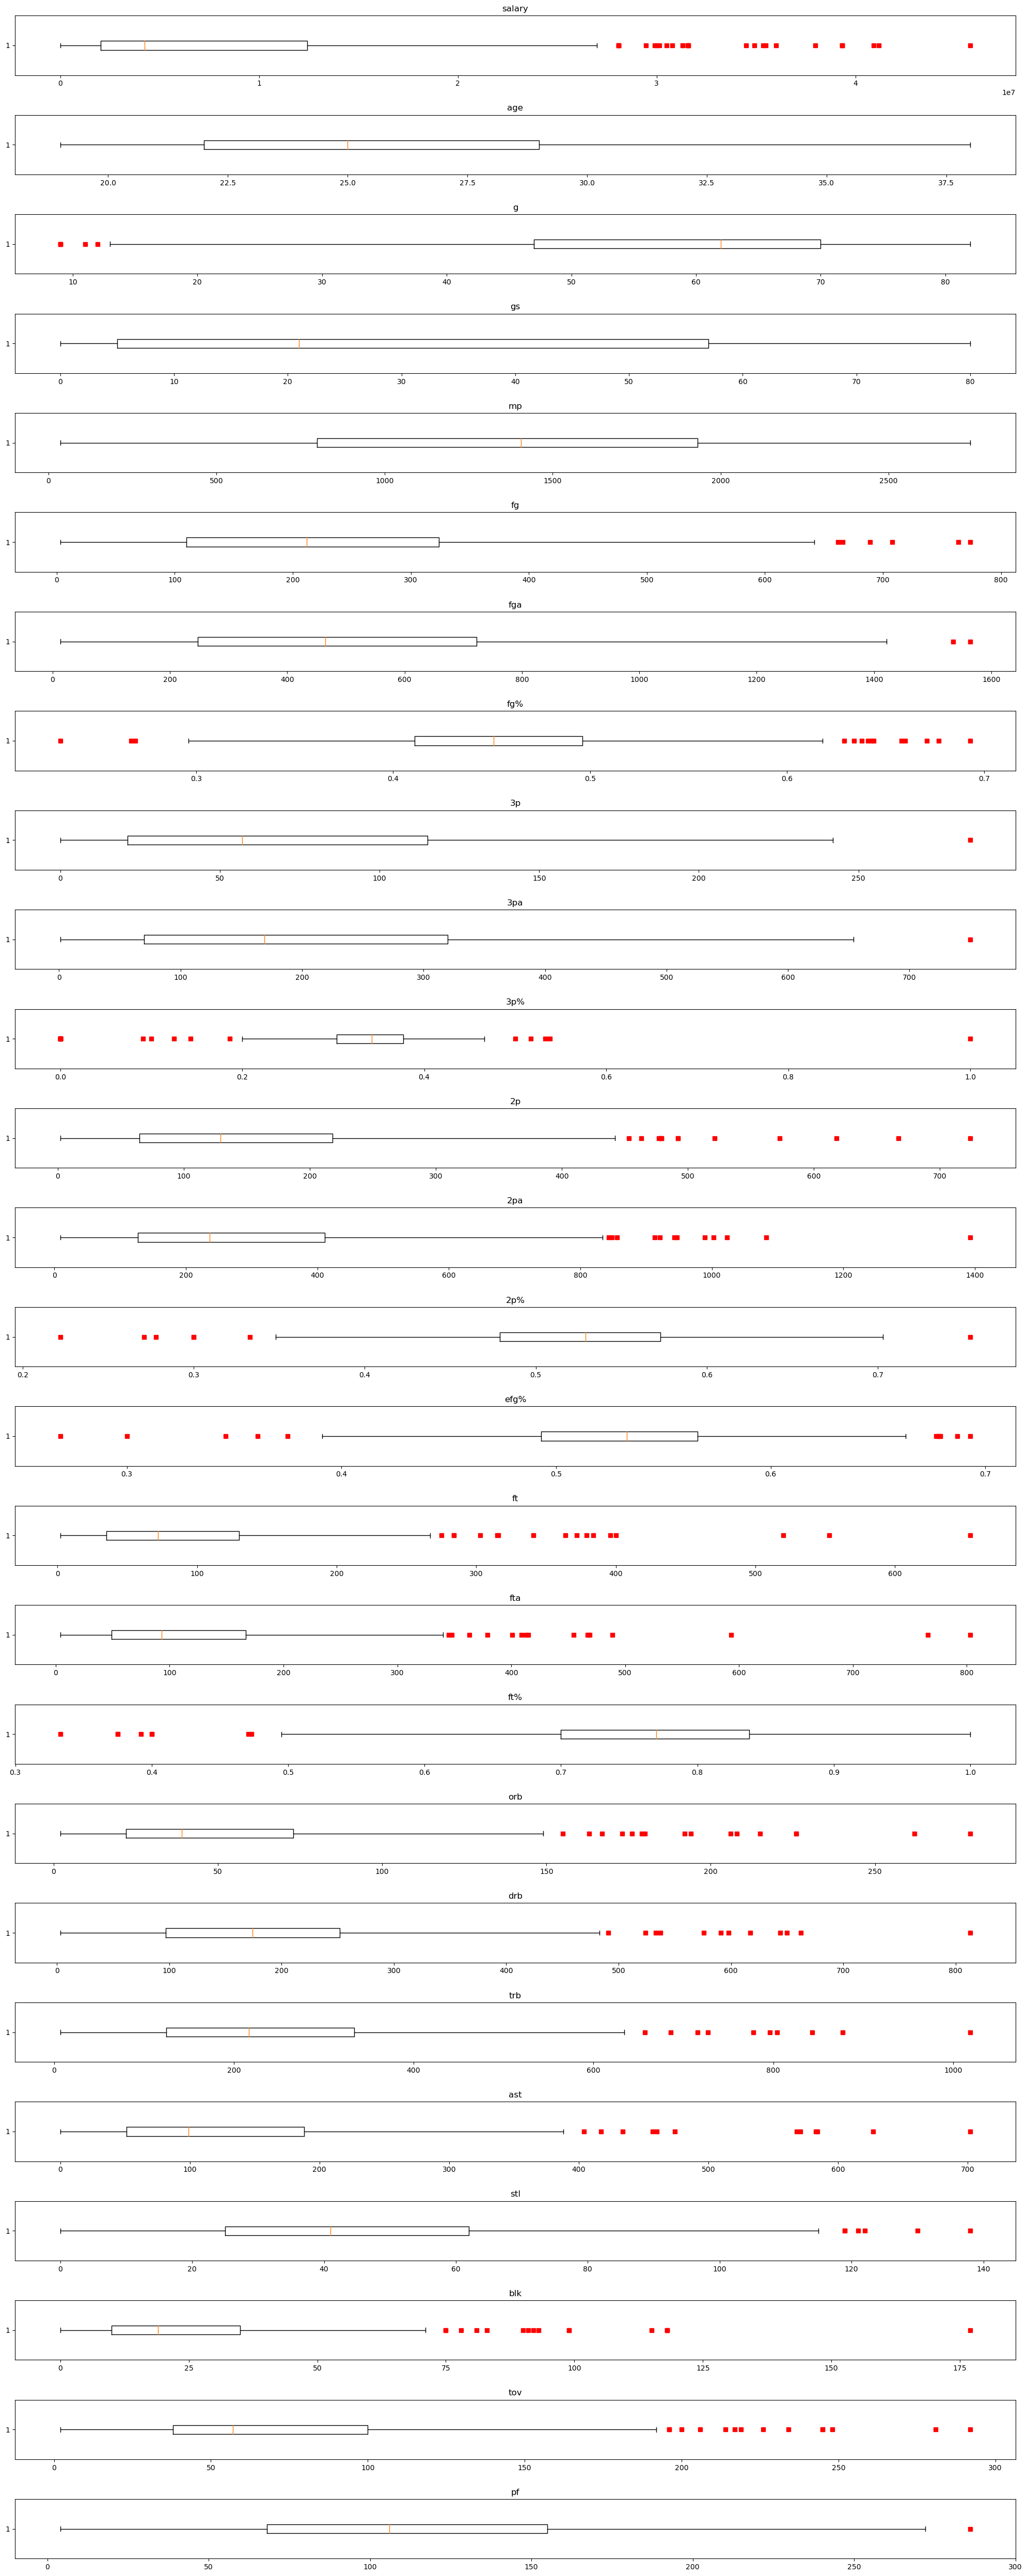

In [107]:
## the next step is to analyze our data
## and see if we have any outliers that could skewness 
## this would provide a quick look into every column
## this would skip one plot and isn't ideal
# fig, ax = plt.subplots(nrows = sum(cleaned_data.dtypes != 'object') - 1, figsize = (20, 50))
# for i, col in enumerate(cleaned_data.columns):
#     if cleaned_data[col].dtype !='object' and i-1 < len(ax):
#         ax[i-1].boxplot(cleaned_data[col], 0, 'rs', 0)
#         ax[i-1].set_title(col)
# fig.tight_layout()

## creating multiple columns
## and plotting a horizantal boxplot
fig, ax = plt.subplots(nrows = sum(cleaned_data.dtypes != 'object') - 1, figsize = (20, 50))
i = 0
for col in cleaned_data.columns:
    if cleaned_data[col].dtype !='object' and i < len(ax):
        ax[i].boxplot(cleaned_data[col], 0, 'rs', 0)
        ax[i].set_title(col)
        i+=1
fig.tight_layout(pad=0.1)